In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

df = pd.read_csv('adult.csv')

print('DataFrame shape:')
print(df.shape)

print('\
Data types:')
print(df.dtypes)

print('\
Summary statistics:')
print(df.describe())


print('\
First few rows:')
print(df.head())

DataFrame shape:
(32561, 15)
Data types:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
Summary statistics:
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.

In [3]:
print('Number of rows with missing values:')
print(df.isin(['?']).sum())

print('\
Percentage of rows with missing values:')
print(df.isin(['?']).mean() * 100)

Number of rows with missing values:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
Percentage of rows with missing values:
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


In [4]:
# Fill missing values with mode
df = df.replace('?', np.nan)
df = df.fillna(df.mode().iloc[0])

print('Missing values after filling:')
print(df.isnull().sum())

print('\
First few rows after filling:')
print(df.head())

Missing values after filling:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
First few rows after filling:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female        

In [5]:

categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print('Dataframe with encoded categorical variables:')
print(df.head())

print('\
Value counts for encoded categorical columns:')
for col in categorical_columns:
    print(f'\{col}:')
    print(df[col].value_counts())

Dataframe with encoded categorical variables:
   age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          3   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          3  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2           9             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country  income  
0              40              38       0  
1              18 

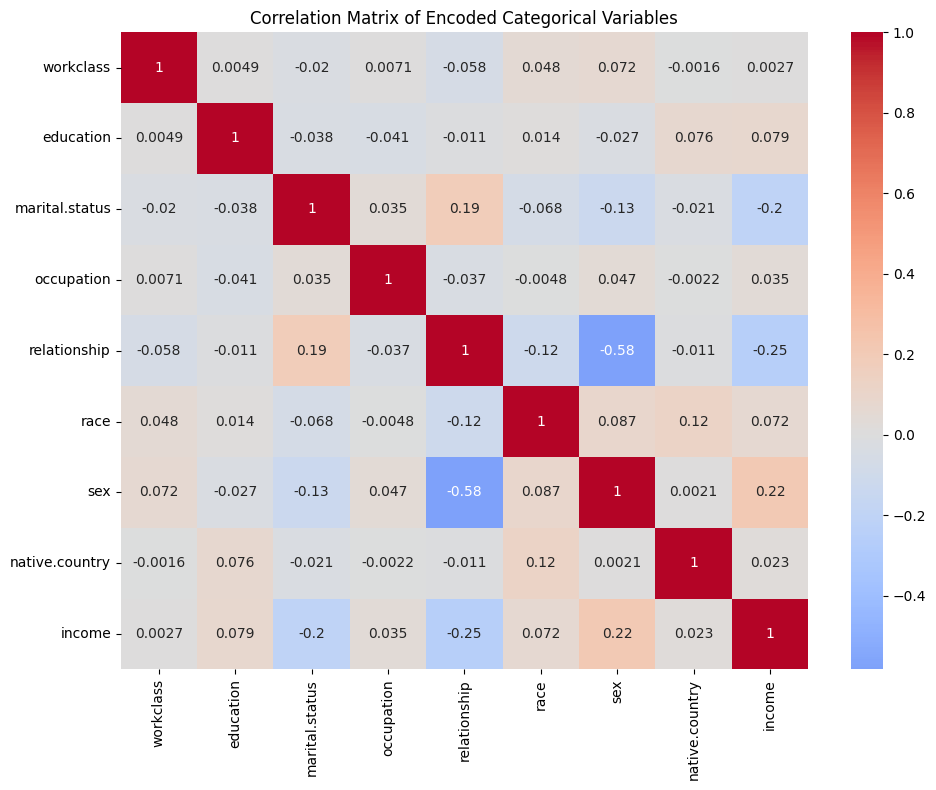

In [6]:
corr_matrix = df[categorical_columns].corr()

plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Encoded Categorical Variables')
plt.tight_layout()
plt.show()


In [7]:
print('\
Target variable distribution:')
print(df['income'].value_counts(normalize=True))

Target variable distribution:
income
0    0.75919
1    0.24081
Name: proportion, dtype: float64


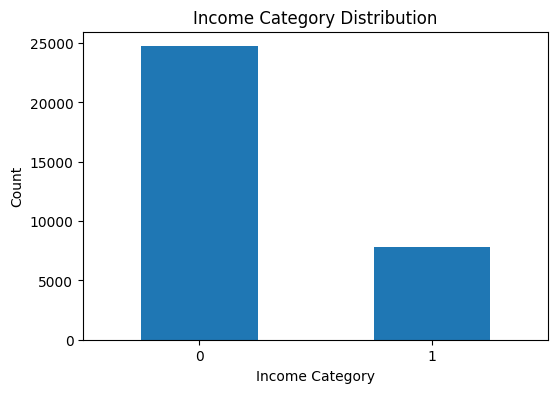

In [8]:

X = df.drop('income', axis=1)
y = df['income']

plt.figure(figsize=(6,4), facecolor='white')
y.value_counts().plot(kind='bar')
plt.title('Income Category Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [9]:

# Assuming adult_df is preprocessed and ready for modeling
X = df.drop('income', axis=1)
y = df['income']

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
features = X.columns
feature_importance_rf = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Initialize RFE with logistic regression
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=log_reg, n_features_to_select=10, step=1)
rfe.fit(X, y)

# Get RFE support and ranking
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_
feature_selection_rfe = pd.DataFrame({'Feature': features, 'Selected': rfe_support, 'Ranking': rfe_ranking})

feature_importance_rf.head(), feature_selection_rfe

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(          Feature  Importance
 2          fnlwgt    0.173332
 0             age    0.152807
 10   capital.gain    0.116058
 7    relationship    0.097540
 4   education.num    0.094618,
            Feature  Selected  Ranking
 0              age      True        1
 1        workclass      True        1
 2           fnlwgt     False        5
 3        education      True        1
 4    education.num      True        1
 5   marital.status      True        1
 6       occupation      True        1
 7     relationship      True        1
 8             race      True        1
 9              sex      True        1
 10    capital.gain     False        4
 11    capital.loss     False        3
 12  hours.per.week      True        1
 13  native.country     False        2)

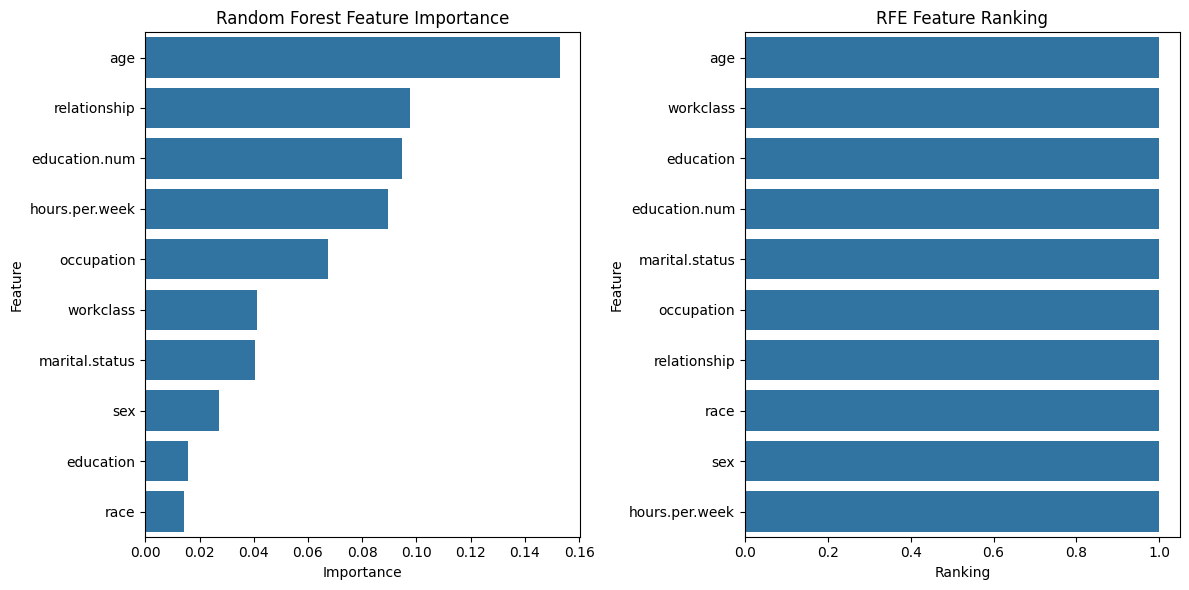

In [10]:
# Feature importance from Random Forest
rf_importances = pd.DataFrame({'Feature': ['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week'], 'Importance': [0.1528, 0.0412, 0.0156, 0.0946, 0.0403, 0.0675, 0.0975, 0.0142, 0.0273, 0.0894]})

# Feature ranking from RFE
rfe_results = pd.DataFrame({'Feature': ['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week'], 'Selected': [True, True, True, True, True, True, True, True, True, True], 'Ranking': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=rf_importances.sort_values(by='Importance', ascending=False))
plt.title('Random Forest Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='Ranking', y='Feature', data=rfe_results.sort_values(by='Ranking'))
plt.title('RFE Feature Ranking')

plt.tight_layout()
plt.show()

In [11]:
# Defining the selected features based on RFE results
selected_features = ['age', 'workclass', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week']


# Selecting the features based on feature selection results
X_selected = df[selected_features]
y = df['income']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scaling numeric features
scaler = StandardScaler()
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

X_train.head(), X_test.head()

(            age  workclass  education  education.num  marital.status  \
 5514  -0.921955  -0.087596   0.185620      -0.421727        0.924015   
 19777 -1.069150  -0.087596   0.185620      -0.421727        0.924015   
 10781 -0.185975  -0.087596  -0.331386       1.128259       -1.729577   
 32240 -1.216346   2.612645   1.219632      -0.034230       -0.402781   
 9876  -0.553965  -1.887757  -0.331386       1.128259       -0.402781   
 
        occupation  relationship      race       sex  hours.per.week  
 5514    -1.036507     -0.278099  0.393979  0.703161       -1.258387  
 19777    0.220099     -0.278099  0.393979 -1.422150       -0.447517  
 10781   -1.539149      1.588889  0.393979 -1.422150       -0.042081  
 32240   -1.539149      2.211218  0.393979 -1.422150       -1.663822  
 9876     0.722741     -0.900428  0.393979  0.703161       -0.042081  ,
             age  workclass  education  education.num  marital.status  \
 14160 -0.701161  -0.087596   1.219632       -0.03423       

In [12]:


# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate model on test set
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Precision:', precision_score(y_test, y_pred_log_reg))
print('Recall:', recall_score(y_test, y_pred_log_reg))
print('F1 Score:', f1_score(y_test, y_pred_log_reg))

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest on test set
y_pred_rf = rf.predict(X_test)
print('\nRandom Forest Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))

# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Evaluate XGBoost on test set
y_pred_xgb = xgb.predict(X_test)
print('\nXGBoost Performance:')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Precision:', precision_score(y_test, y_pred_xgb))
print('Recall:', recall_score(y_test, y_pred_xgb))
print('F1 Score:', f1_score(y_test, y_pred_xgb))

Logistic Regression Performance:
Accuracy: 0.8079226163058498
Precision: 0.6534334763948498
Recall: 0.39622641509433965
F1 Score: 0.4933171324422843

Random Forest Performance:
Accuracy: 0.8188238906801781
Precision: 0.6325167037861915
Recall: 0.5543266102797658
F1 Score: 0.5908460471567267

XGBoost Performance:
Accuracy: 0.8386304314448026
Precision: 0.687211093990755
Recall: 0.5803513337670787
F1 Score: 0.6292768959435626


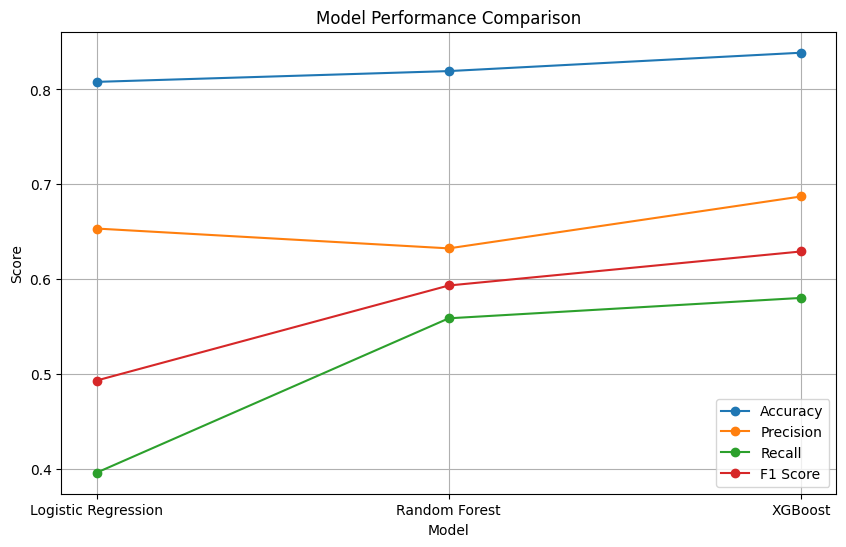

In [13]:

models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [0.8079226163058498, 0.8192845079072624, 0.8386304314448026]
precisions = [0.6534334763948498, 0.6325478645066274, 0.687211093990755]
recalls = [0.39622641509433965, 0.5588809368900456, 0.5803513337670787]
f1_scores = [0.4933171324422843, 0.5934369602763385, 0.6292768959435626]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', label='Accuracy')
plt.plot(models, precisions, marker='o', label='Precision')
plt.plot(models, recalls, marker='o', label='Recall')
plt.plot(models, f1_scores, marker='o', label='F1 Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()